<a href="https://colab.research.google.com/github/cbg27/NLP_Final/blob/main/NLP_DATA_CLEANUP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# NLP Final Project Part 1 
> This notebook is for collecting data, cleanups and Exploratory Data Analysis!
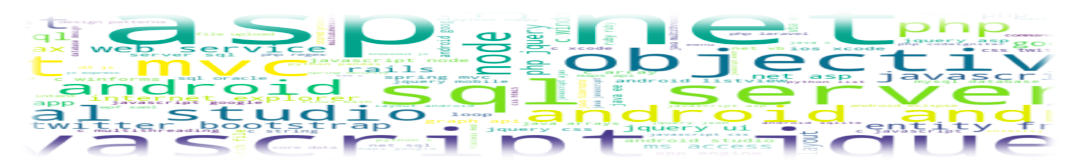
---



In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
import pandas as pd
from bs4 import BeautifulSoup
from google.colab import drive
import os
import joblib as jp
import pickle
import re 
from tqdm import tqdm, tqdm_notebook
tqdm_notebook().pandas()
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
from datetime import datetime
import warnings
import warnings
warnings.filterwarnings('ignore')
warnings.simplefilter('ignore')

<ipython-input-1-53104980664b>:14: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  tqdm_notebook().pandas()


0it [00:00, ?it/s]

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

data_prep_path= '/content/drive/MyDrive/dataPrep/'
data_prep_path_final='/content/drive/MyDrive/dataPrepFinal/'

data_prep_path_code= '/content/drive/MyDrive/dataPrep/code/'
data_prep_path_mode_code='/content/drive/MyDrive/dataPrepFinal/code/'


Mounted at /content/drive


### Load Question CSV and Tags CSV

In [ ]:
path_question = '/content/drive/MyDrive/Questions.csv'
path_tags = '/content/drive/MyDrive/Tags.csv'

In [ ]:
df_questions = pd.read_csv(path_question, encoding="ISO-8859-1")

 > <font color="Blue">   There are 1.2 MM rows with 7 columns in the Question CSV, relevant  columns are Body, Tags, and Id </font>

In [ ]:
df_questions

,Id,OwnerUserId,CreationDate,ClosedDate,Score,Title,Body
0,80,26.0,2008-08-01T13:57:07Z,NaN,26,SQLStatement.execute() - multiple queries in o...,<p>I've written a database generation script i...
1,90,58.0,2008-08-01T14:41:24Z,2012-12-26T03:45:49Z,144,Good branching and merging tutorials for Torto...,<p>Are there any really good tutorials explain...
2,120,83.0,2008-08-01T15:50:08Z,NaN,21,ASP.NET Site Maps,<p>Has anyone got experience creating <strong>...
3,180,2089740.0,2008-08-01T18:42:19Z,NaN,53,Function for creating color wheels,<p>This is something I've pseudo-solved many t...
4,260,91.0,2008-08-01T23:22:08Z,NaN,49,Adding scripting functionality to .NET applica...,<p>I have a little game written in C#. It uses...
...,...,...,...,...,...,...,...
1264211,40143210,5610777.0,2016-10-19T23:38:01Z,NaN,0,URL routing in PHP (MVC),<p>I am building a custom MVC project and I ha...
1264212,40143300,3791161.0,2016-10-19T23:48:09Z,NaN,0,Bigquery.Jobs.Insert - Resumable Upload?,<p>The API docs show that you should be able t...
1264213,40143340,7028647.0,2016-10-19T23:52:50Z,NaN,1,Obfuscating code in android studio,<p>Under minifyEnabled I changed from false to...
1264214,40143360,871677.0,2016-10-19T23:55:24Z,NaN,0,How to fire function after v-model change?,<p>I have input which I use to filter my array...


In [ ]:
df_tags = pd.read_csv(path_tags, encoding="ISO-8859-1")

> <font color="blue"> Tags Data set has 3.7MM rows with one to many relationship with questions , i.e one question can have multiple tags (generally stackoverflow limits to 5 tags for one post </font>





In [ ]:
df_tags


,Id,Tag
0,80,flex
1,80,actionscript-3
2,80,air
3,90,svn
4,90,tortoisesvn
...,...,...
3750989,40143360,javascript
3750990,40143360,vue.js
3750991,40143380,npm
3750992,40143380,mocha


> Removed NA from tags data 

In [ ]:
df_tags['Tag'].isna().sum()
df_tags = df_tags.dropna()

> <font color="blue">Top 10 *Tags*</font>

In [ ]:
tag_value_counts = df_tags["Tag"].value_counts()
top_ten_tags = tag_value_counts.head(10)
top_ten_tags

javascript    124155
java          115212
c#            101186
php            98808
android        90659
jquery         78542
python         64601
html           58976
c++            47591
ios            47009
Name: Tag, dtype: int64

> <font color="blue">Tags with more than 100000 count</font>

In [ ]:
top_tag_df = df_tags["Tag"].value_counts().rename_axis('tags').to_frame('counts')
top_tag_df.head(100)
top_tag_df[top_tag_df['counts'] >100000]


,counts
tags,
javascript,124155
java,115212
c#,101186


> <font color="blue">Visualize the count for Top 10 Tags</font>

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 <a list of 10 Text major ticklabel objects>)

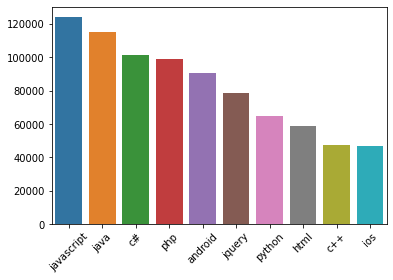

In [ ]:
sns.barplot(x=top_ten_tags.index, y=top_ten_tags.values)
plt.xticks(rotation=45)

> <font color="blue">Visualize the count for Top 50 to have a better visualization about the distribution</font>:
>We can see that the number of questions per tag clearly demostrates a long tail distribution. Therefore, we can limit the number of tags to include in the dataset, so that the model training can be more efficient, while still maintain a high level of accuracy.



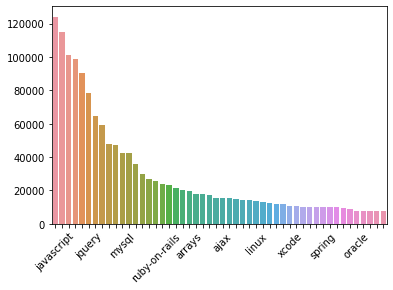

In [ ]:
top_fifty_tags = tag_value_counts.head(50)
top_fifty_tags_barplot = sns.barplot(x=top_fifty_tags.index, y=top_fifty_tags.values)
for i, label in enumerate(top_fifty_tags_barplot.xaxis.get_ticklabels()):
    if i % 5 != 0:
        label.set_visible(False)
plt.xticks(rotation=45)
top_fifty_tags_barplot

In [ ]:
pd.options.display.float_format = "{:.2f}%".format
100 * tag_value_counts.head(2000).cumsum() / tag_value_counts.sum()

javascript             3.31%
java                   6.38%
c#                     9.08%
php                   11.72%
android               14.13%
                       ...  
mybatis               83.28%
messaging             83.29%
nstableview           83.29%
decode                83.30%
internet-explorer-6   83.30%
Name: Tag, Length: 2000, dtype: float64

>The top 2000 tags cover almost 83% of the questions in the dataset. Therefore, its safe to limit the dataset to include only questions with the top 2000 tags to reduce the size and time for model training.
<font color='red'>For Logistic Regression and Transformers we had to further limit out tags to get enough compute capacity and save time on time computation</font>

##Joining Questions with Tags

In [ ]:
tags_per_question_df = df_tags.groupby(['Id'])['Tag'].apply(list)
df_so = df_questions[["Id", "Title", "Body"]].merge(tags_per_question_df.to_frame(), on="Id",how="right")

In [ ]:
df_so.head()

,Id,Title,Body,Tag
0,80,SQLStatement.execute() - multiple queries in o...,<p>I've written a database generation script i...,"[flex, actionscript-3, air]"
1,90,Good branching and merging tutorials for Torto...,<p>Are there any really good tutorials explain...,"[svn, tortoisesvn, branch, branching-and-merging]"
2,120,ASP.NET Site Maps,<p>Has anyone got experience creating <strong>...,"[sql, asp.net, sitemap]"
3,180,Function for creating color wheels,<p>This is something I've pseudo-solved many t...,"[algorithm, language-agnostic, colors, color-s..."
4,260,Adding scripting functionality to .NET applica...,<p>I have a little game written in C#. It uses...,"[c#, .net, scripting, compiler-construction]"


In [ ]:
df_so.columns = map(str.lower, df_so.columns)

In [ ]:
df_so["tag_count"] = df_so["tag"].apply(len)

>Minimum, maximum and average tags per question

In [ ]:
min_tag_count = df_so["tag_count"].min()
max_tag_count = df_so["tag_count"].max()
avg_tag_count = df_so["tag_count"].mean()

In [ ]:
print(min_tag_count)
print(max_tag_count)
print(avg_tag_count)

1
5
2.9661758214985756


> Function to figure out whether body contains the code snippet or not. All the code is surrounded by '<'code>'<'/code>'

In [ ]:
def code_available(content):
  if('<code>' in content):
    return True    
  return False

In [ ]:
df_so['code_available'] = df_so['body'].apply(code_available)

In [ ]:
def show_donut_plot(col): 
    rating_data = df_so.groupby(col)[['id']].count().head(10)
    plt.figure(figsize = (12, 8))
    plt.pie(rating_data['id'], autopct = '%1.0f%%', startangle = 140, pctdistance = 1.1, shadow = True)
    # create a center circle for more aesthetics to make it better
    gap = plt.Circle((0, 0), 0.5, fc = 'white')
    fig = plt.gcf()
    fig.gca().add_artist(gap)
    plt.axis('equal')  
    cols = []
    for index, row in rating_data.iterrows():
        cols.append(index)
    plt.legend(cols)
    
    plt.title('Donut Plot: SOF Questions by ' +str(col), loc='center')
    plt.show()

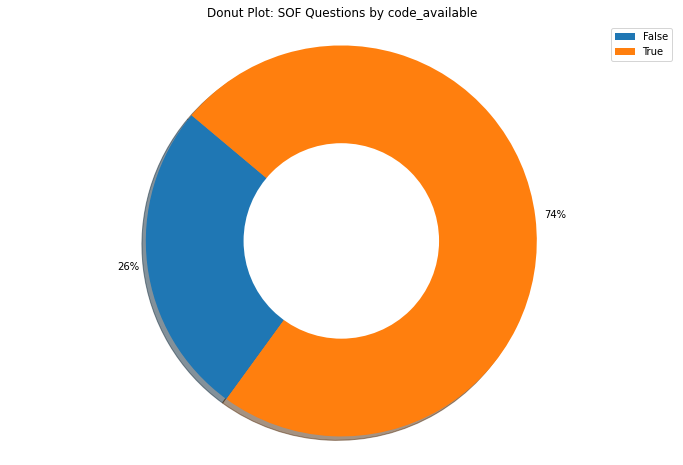

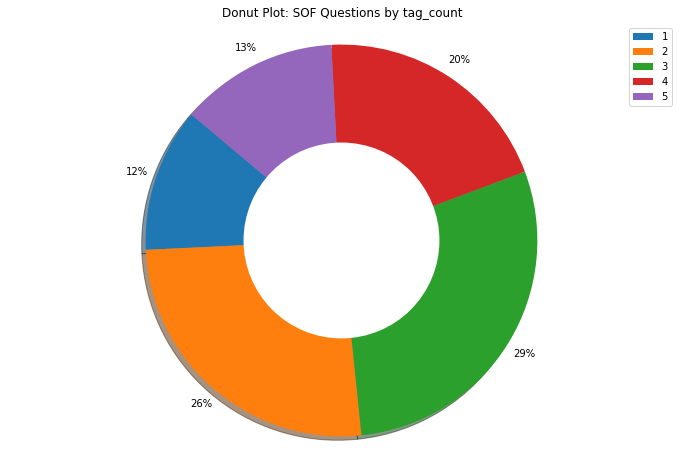

In [ ]:
show_donut_plot('code_available')
show_donut_plot('tag_count')

In [ ]:
# Lets make a pickle file not to lose the project 
df_so.to_pickle(f"{data_prep_path_code}/df_so-1.pkl")

In [ ]:
df_so_1 = pd.read_pickle(f"{data_prep_path_code}/df_so-1.pkl")

In [ ]:
df_so_1["body"] = df_so_1["body"].progress_apply(lambda text: BeautifulSoup(text, "lxml").text)

  0%|          | 0/1264214 [00:00<?, ?it/s]

In [ ]:
df_so_1["body"] = df_so_1["body"].str.lower()

In [ ]:
import nltk
nltk.download("punkt")

# we have to keep a list of topics with symbols or digits that people will actually type in because of how nltk handles word tokenization
# this list includes tags that have more than 10,000 questions
topics_with_symbols = ["c#", "c++", ".net", "asp.net", "node.js", "objective-c", "unity3d", "html5", "css3", \
                       "d3.js", "utf-8", "neo4j", "scikit-learn", "f#", "3d", "x86","asp.net-mvc"]

df_so_1["body_tokenized"] = df_so_1["body"].progress_apply(lambda text: [word for word in nltk.word_tokenize(text) \
                                                               if word.isalpha() or word in list("+#") + topics_with_symbols])

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


  0%|          | 0/1264214 [00:00<?, ?it/s]

In [ ]:
mwe_tokenizer = nltk.MWETokenizer(separator="")
mwe_tokenizer.add_mwe(("c", "#"))
mwe_tokenizer.add_mwe(("c", "+", "+"))
mwe_tokenizer.add_mwe(("f", "#"))
df_so_1["body_tokenized"] = df_so_1["body_tokenized"].progress_apply(lambda tokens: [token for token in mwe_tokenizer.tokenize(tokens)])

  0%|          | 0/1264214 [00:00<?, ?it/s]

In [ ]:
from nltk.corpus import stopwords
nltk.download("stopwords")
stop_words = set(stopwords.words("english"))

def filter_stop_words(words):
    words_filtered = []
    for word in words:
        if word not in stop_words:
            words_filtered.append(word)
    return words_filtered

df_so_1["body_tokenized"] = df_so_1["body_tokenized"].progress_apply(filter_stop_words)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


  0%|          | 0/1264214 [00:00<?, ?it/s]

In [ ]:
df_so_1.sample(5)

,id,title,body,tag,tag_count,code_available,body_tokenized
1247990,39762710,Umbraco Change Type of Multiple Media Picker T...,i add to my umbraco datatype a multiple data p...,"[umbraco, umbraco7]",2,True,"[add, umbraco, datatype, multiple, data, picke..."
263179,9717710,Zooming in ScrollView works in iOS4 but crash ...,i have a application that in ios4.3 works perf...,"[objective-c, ios5, ios4, uiscrollview, zooming]",5,True,"[application, works, perfectly, well, crash, e..."
968835,32166980,Android : How to use custom view in Widget [Re...,hi all android developers!\ni want use arc pro...,"[android, android-widget, remoteview]",3,False,"[hi, android, developers, want, use, arc, prog..."
164313,6415320,looping in a stored procedure,i have this stored procedure which returns the...,[stored-procedures],1,True,"[stored, procedure, returns, names, individual..."
767491,25976570,Linux: signal source,how does one find reliably whether a process r...,"[linux, signals]",2,False,"[one, find, reliably, whether, process, receiv..."


In [ ]:
df_so_1["title"] = df_so_1["title"].str.lower()
df_so_1["title_tokenized"] = df_so_1["title"].progress_apply(lambda text: [word for word in nltk.word_tokenize(text) \
                                                               if word.isalpha() or word in list("+#") + topics_with_symbols])
df_so_1["title_tokenized"] = df_so_1["title_tokenized"].progress_apply(lambda tokens: [token for token in mwe_tokenizer.tokenize(tokens)])

  0%|          | 0/1264214 [00:00<?, ?it/s]

  0%|          | 0/1264214 [00:00<?, ?it/s]

In [ ]:
df_so_1["title_tokenized"] = df_so_1["title_tokenized"].progress_apply(filter_stop_words)

  0%|          | 0/1264214 [00:00<?, ?it/s]

In [ ]:
df_so_1.rename(columns={"tag": "tags"}, inplace=True)

In [ ]:
from collections import Counter
tag_count = Counter()
def count_tag(tags):
    for tag in tags:
        tag_count[tag] += 1
df_so_1["tags"].apply(count_tag)
len(tag_count.values())

37034

In [ ]:
most_common_tags = [count[0] for count in tag_count.most_common(1000)]
df_so_1["tags"] = df_so_1["tags"].progress_apply(lambda tags: [tag for tag in tags if tag in most_common_tags])

  0%|          | 0/1264214 [00:00<?, ?it/s]

In [ ]:
df_so_1[df_so_1["tags"].map(lambda tags: len(tags) > 0)].shape

(1215716, 8)

In [ ]:
print(f"Only {1264216 - 1215716:,} rows of data will be dropped while number of classes is reduced from {len(tag_count.values()):,} to 1,000, which is great!")


Only 48,500 rows of data will be dropped while number of classes is reduced from 37,034 to 1,000, which is great!


In [ ]:
df_so_1 = df_so_1[df_so_1["tags"].map(lambda tags: len(tags) > 0)]

In [ ]:
df_so_1

,id,title,body,tags,tag_count,code_available,body_tokenized,title_tokenized
0,80,sqlstatement.execute() - multiple queries in o...,i've written a database generation script in s...,"[flex, actionscript-3, air]",3,True,"[written, database, generation, script, sql, w...","[multiple, queries, one, statement]"
1,90,good branching and merging tutorials for torto...,are there any really good tutorials explaining...,[svn],4,False,"[really, good, tutorials, explaining, branchin...","[good, branching, merging, tutorials, tortoise..."
2,120,asp.net site maps,has anyone got experience creating sql-based a...,"[sql, asp.net]",3,True,"[anyone, got, experience, creating, asp.net, p...","[asp.net, site, maps]"
3,180,function for creating color wheels,this is something i've pseudo-solved many time...,"[algorithm, language-agnostic, colors]",4,True,"[something, many, times, never, quite, found, ...","[function, creating, color, wheels]"
4,260,adding scripting functionality to .net applica...,i have a little game written in c#. it uses a ...,"[c#, .net, scripting, compiler-construction]",4,True,"[little, game, written, c#, uses, database, tr...","[adding, scripting, functionality, .net, appli..."
...,...,...,...,...,...,...,...,...
1264208,40143190,how to execute multiline python code from a ba...,i need to extend a shell script (bash). as i a...,"[python, bash]",3,True,"[need, extend, shell, script, bash, much, fami...","[execute, multiline, python, code, bash, script]"
1264209,40143210,url routing in php (mvc),i am building a custom mvc project and i have ...,"[php, .htaccess]",2,True,"[building, custom, mvc, project, base, folder,...","[url, routing, php, mvc]"
1264211,40143340,obfuscating code in android studio,under minifyenabled i changed from false to tr...,"[android, android-studio]",2,True,"[minifyenabled, changed, false, true, buildtyp...","[obfuscating, code, android, studio]"
1264212,40143360,how to fire function after v-model change?,i have input which i use to filter my array of...,[javascript],2,True,"[input, use, filter, array, objects, vue, usin...","[fire, function, change]"


In [ ]:
df_so_1.to_pickle(f"{data_prep_path_code}/df_so_2.pkl")


